**STEGANOGRAFI**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
# Fungsi untuk menyisipkan pesan (encoding)
def lsb_encode(cover_image, secret_message):
    # Konversi pesan menjadi bit
    message_bits = ''.join(format(ord(char), '08b') for char in secret_message) + '00000000'
    encoded_image = cover_image.copy()
    data_index = 0

    for row in encoded_image:
        for pixel in row:
            for channel in range(3):  # Iterasi tiap channel warna (B, G, R)
                if data_index < len(message_bits):
                    pixel[channel] = (pixel[channel] & ~1) | int(message_bits[data_index])
                    data_index += 1
                else:
                    break

    return encoded_image

In [ ]:
# Fungsi untuk mengekstraksi pesan (decoding)
def lsb_decode(encoded_image):
    message_bits = []
    for row in encoded_image:
        for pixel in row:
            for channel in range(3):  # Iterasi tiap channel warna (B, G, R)
                message_bits.append(pixel[channel] & 1)

    # Mengonversi bit ke teks
    message_bytes = [message_bits[i:i + 8] for i in range(0, len(message_bits), 8)]
    secret_message = ''.join(chr(int(''.join(map(str, byte)), 2)) for byte in message_bytes)

    # Menghapus padding null karakter
    return secret_message.split('\x00', 1)[0]

Upload gambar cover:


Saving Cover Stego.jpg to Cover Stego.jpg
Gambar Cover:


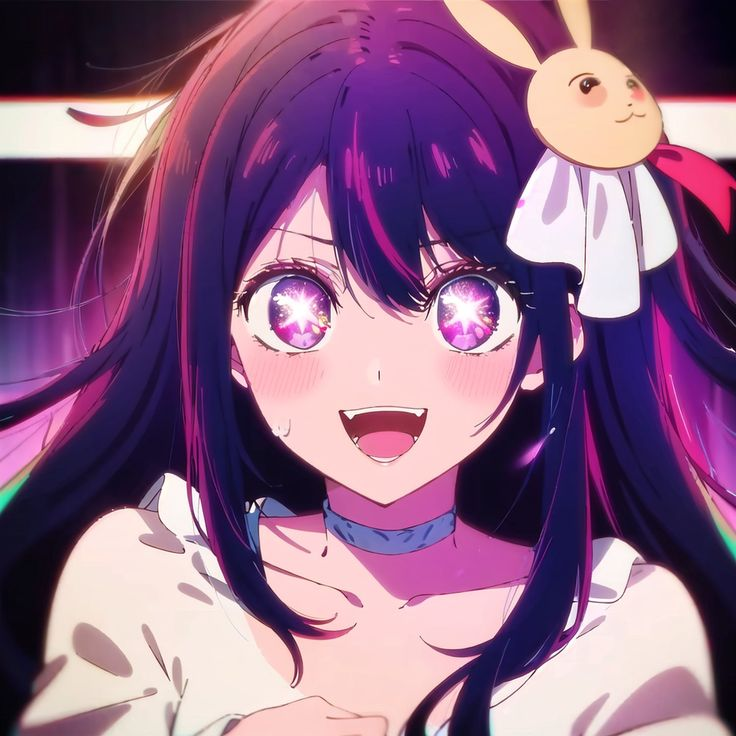

In [ ]:
# Upload gambar cover
print("Upload gambar cover:")
uploaded_cover = files.upload()
cover_path = list(uploaded_cover.keys())[0]
cover_image = cv2.imread(cover_path)

# Tampilkan gambar cover
print("Gambar Cover:")
cv2_imshow(cover_image)

In [ ]:
# Input pesan rahasia
secret_message = input("Masukkan pesan rahasia: ")

Masukkan pesan rahasia: oshinoko


Proses encoding selesai!
Gambar dengan pesan rahasia:


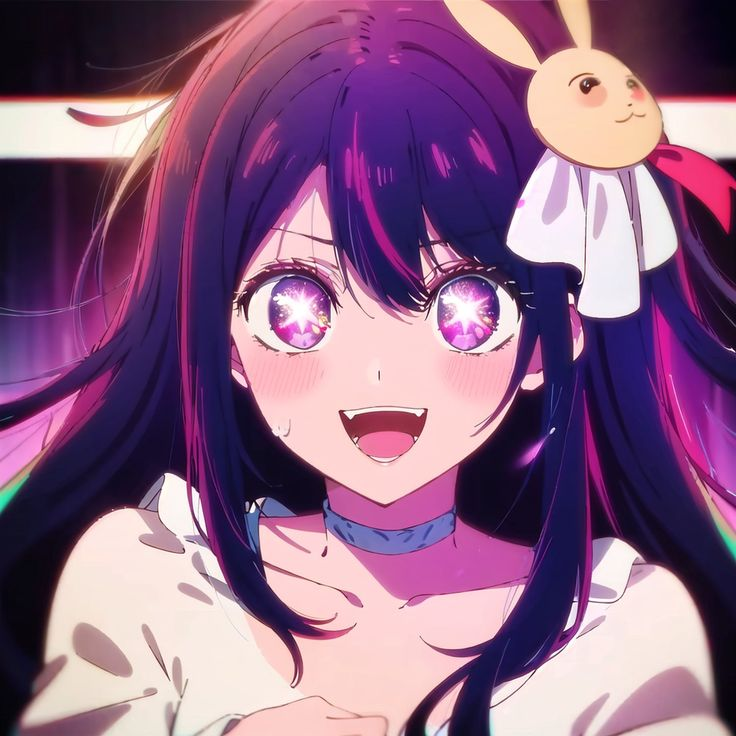

In [ ]:
# Proses encoding
encoded_image = lsb_encode(cover_image, secret_message)
print("Proses encoding selesai!")
print("Gambar dengan pesan rahasia:")
cv2_imshow(encoded_image)

In [ ]:
# Simpan gambar hasil encoding
encoded_path = "encoded_image.png"
cv2.imwrite(encoded_path, encoded_image)
print(f"Gambar hasil encoding disimpan sebagai {encoded_path}")

Gambar hasil encoding disimpan sebagai encoded_image.png


In [ ]:
# Proses decoding
decoded_message = lsb_decode(encoded_image)
print(f"Pesan rahasia yang disisipkan: {decoded_message}")

Pesan rahasia yang disisipkan: oshinoko
